In [22]:
# Mount our Google Drive
# from google.colab import drive

# drive.mount('/content/drive')

In [23]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("../../data/movie-data-csv/trailers12k.csv")
df.head(2).T

,0,1
title,Kate & Leopold,The Fantasticks
year,2001,2000
plot,['An English Duke from 1876 is inadvertedly dr...,['A mysterious fair that comes to a small comm...
synopsis,"In 1876, Leopold Alexis Elijah Walker Gareth T...",NaN
genres,"['comedy', 'fantasy', 'romance']","['musical', 'romance']"


### Data Understanding

In [25]:
df.columns

Index(['title', 'year', 'plot', 'synopsis', 'genres'], dtype='object')

In [26]:
df.shape

(12000, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     12000 non-null  object
 1   year      12000 non-null  int64 
 2   plot      12000 non-null  object
 3   synopsis  4919 non-null   object
 4   genres    12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


In [28]:
missing_info = df.isnull().sum().to_frame(name='Null Count')
missing_info['Null Percentage (%)'] = (df.isnull().mean() * 100).round(2)
missing_info = missing_info.sort_values(by='Null Count', ascending=False)
missing_info

,Null Count,Null Percentage (%)
synopsis,7081,59.01
title,0,0.00
year,0,0.00
plot,0,0.00
genres,0,0.00


In [29]:
df.describe()

,year
count,12000.000000
mean,2011.683667
std,5.285429
min,1999.000000
25%,2008.000000
50%,2013.000000
75%,2016.000000
max,2021.000000


In [30]:
import ast

# Parsing string representations of lists (like "[comedy, drama]") into actual Python list objects (['comedy', 'drama'])
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

Check one random instance of a movie plot

In [31]:
# Select one random row
random_row = df.sample(1).iloc[0]
# Print the title and plot
print(f"🎬 Title: {random_row['title']}")
print(f"📅 Year: {random_row['year']}")
print(f"📖 Plot: {random_row['plot']}")

🎬 Title: Gerald's Game
📅 Year: 2017
📖 Plot: ['A couple tries to spice up their marriage in a remote lake house. After the husband dies unexpectedly, the wife is left handcuffed to their bed frame and must fight to survive and break free.', 'When a harmless game between a married couple in a remote retreat suddenly becomes a harrowing fight for survival, wife Jessie must confront long-buried demons within her own mind - and possibly lurking in the shadows of her seemingly empty house.', "As a last resort to save their tattered marriage, Gerald and Jessie Burlingame set off on a weekend adventure at their secluded lakeside retreat, in the hope of rekindling the long-lost affection in their relationship. Everything is taken care of: the fridge is well-stocked, and there's not a soul in the area to disturb the couple, as Gerald intends on playing a harmless but kinky sex game with a pair of handcuffs and a lot of imagination. But instead, when an unforeseen situation leaves Jessie handcuff

Check the minimum and maximum number of movie plots a single instance has

In [32]:
# Convert 'plots' from string to list if it's stored as string
df['plot'] = df['plot'].apply(ast.literal_eval)
# Compute number of plots for each row
df['num_plots'] = df['plot'].apply(len)

# Find min and max
min_plots = df['num_plots'].min()
max_plots = df['num_plots'].max()

print(f"Minimum number of plots in a single movie: {min_plots}")
print(f"Maximum number of plots in a single movie: {max_plots}")

Minimum number of plots in a single movie: 0
Maximum number of plots in a single movie: 9


Check the maximum and minimum length of plot description

In [33]:
# Convert the list of plot descriptions into a single string per movie
df['merged_plot'] = df['plot'].apply(lambda plots: ' '.join(plots))

# Calculate the length of each description
description_lengths = df['merged_plot'].str.len()

max_length = description_lengths.max()
min_length = description_lengths.min()

print(f"Maximum description length: {max_length}")
print(f"Minimum description length: {min_length}")

Maximum description length: 8348
Minimum description length: 0


Check the maximum and minimum number of genres a particular movie has

In [34]:
# Calculate the number of genres for each movie
genre_counts = df['genres'].apply(len)

# Find the max and min number of genres
max_genres = genre_counts.max()
min_genres = genre_counts.min()

print(f"Maximum number of genres for a movie: {max_genres}")
print(f"Minimum number of genres for a movie: {min_genres}")

Maximum number of genres for a movie: 10
Minimum number of genres for a movie: 1


Maximum and minimum movie released year

In [35]:
latest_movie_year = df['year'].max()
oldest_movie_year = df['year'].min()

print(f"Latest oldest year of a movie : {latest_movie_year}")
print(f"Oldest realease year a movie: {oldest_movie_year}")

Latest oldest year of a movie : 2021
Oldest realease year a movie: 1999


### Exploratory Data Analysis

Check distribution of each individual genres



In [36]:
from collections import Counter

all_genres = df['genres'].dropna().sum()
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)
genre_df['Percentage (%)'] = (genre_df['Count'] / genre_df['Count'].sum()) * 100
genre_df

,Genre,Count,Percentage (%)
0,drama,6106,16.701770
1,thriller,4560,12.472989
2,comedy,4247,11.616839
3,action,3226,8.824093
4,crime,2615,7.152821
5,horror,2575,7.043409
6,romance,2266,6.198200
7,adventure,2073,5.670286
8,mystery,1677,4.587106
9,fantasy,1648,4.507782


Genre distribution plot by Count


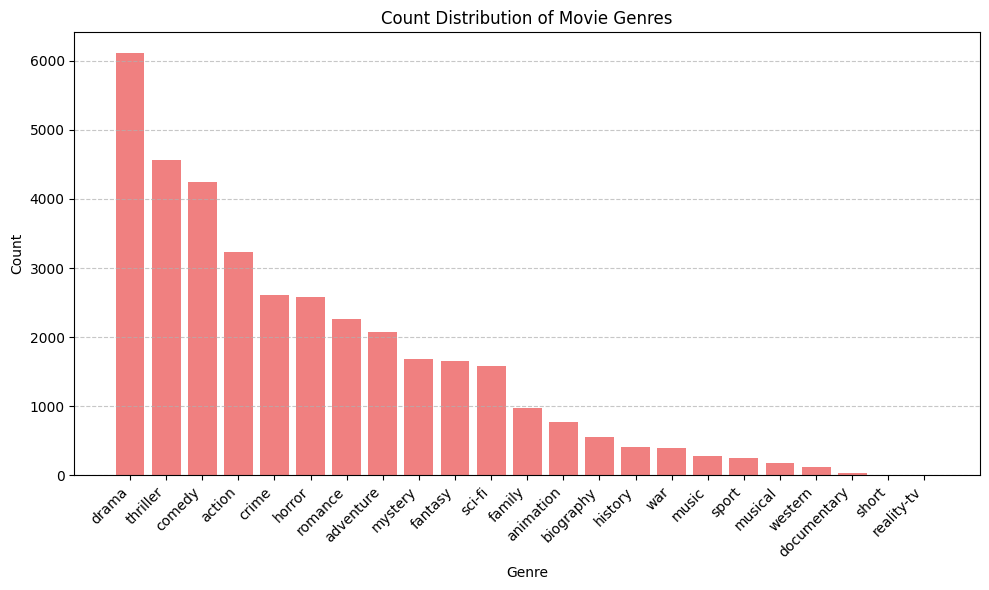

In [37]:
# Plotting the distribution by percentage
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='lightcoral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
print("Genre distribution plot by Count")

Most Common Genre Combinations

In [38]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
genre_set_counts.head(20)

genres
[drama, comedy]                      458
[romance, drama, comedy]             426
[comedy]                             405
[horror, thriller]                   348
[romance, comedy]                    319
[crime, thriller, drama]             303
[horror]                             279
[romance, drama]                     256
[action, thriller, crime]            228
[horror, thriller, mystery]          228
[action, thriller, drama, crime]     202
[drama]                              202
[drama, thriller]                    181
[crime, drama]                       170
[action, thriller]                   145
[crime, thriller, drama, mystery]    142
[horror, comedy]                     113
[horror, drama, thriller]            103
[thriller]                            96
[crime, comedy]                       94
Name: count, dtype: int64

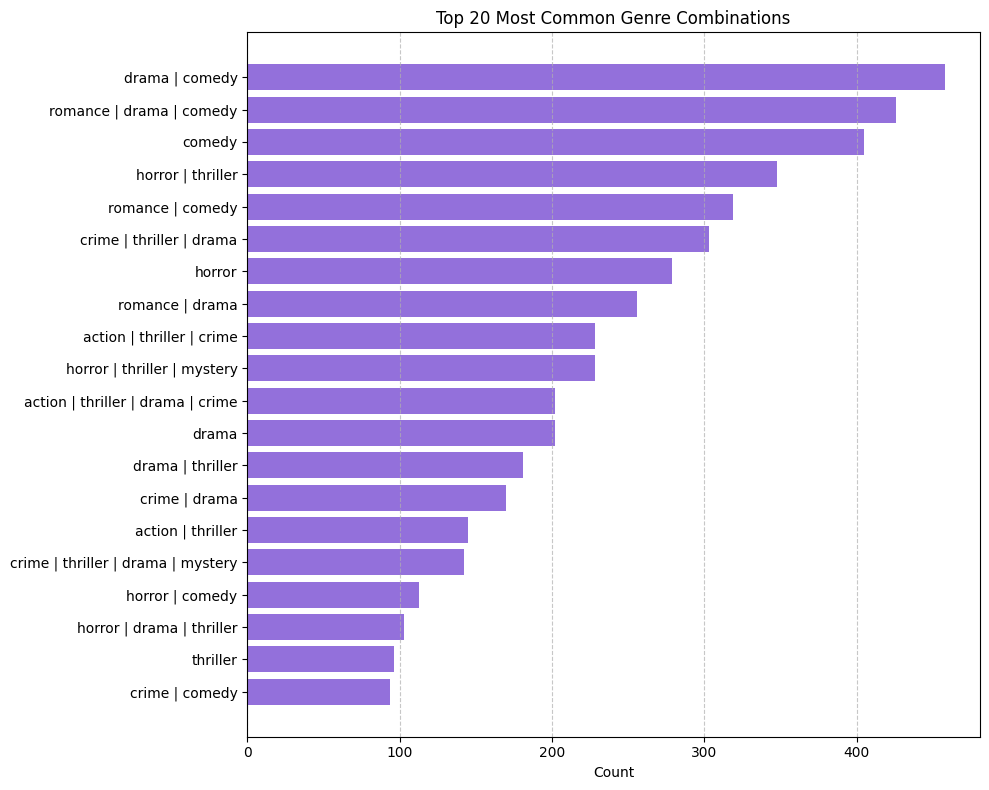

In [39]:
top_20_genres = genre_set_counts.head(20)
labels = [' | '.join(g) for g in top_20_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_20_genres.values, color='mediumpurple')
plt.xlabel('Count')
plt.title('Top 20 Most Common Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Genre Combinations (With more than one genre)

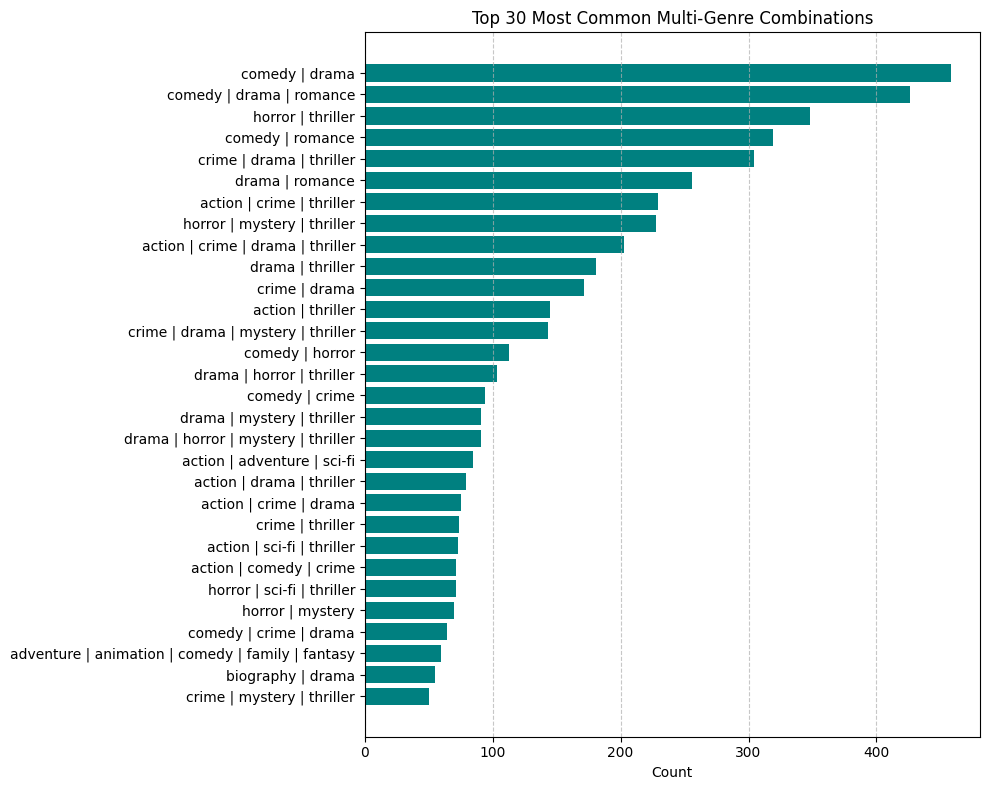

In [40]:
genre_sets = df['genres'].apply(lambda x: frozenset(x))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) > 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(30)
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Top 30 Most Common Multi-Genre Combinations')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Most Common Single Genre (With more than one genre)

In [41]:
genre_sets = df['genres'].apply(lambda x: list(frozenset(x)))
genre_set_counts = genre_sets.value_counts()
multi_genre_combinations = genre_set_counts[[len(g) <= 1 for g in genre_set_counts.index]]
top_multi_genres = multi_genre_combinations.head(20)
top_multi_genres

genres
[comedy]         405
[horror]         279
[drama]          202
[thriller]        96
[action]          42
[sci-fi]          20
[crime]           17
[adventure]        7
[fantasy]          7
[romance]          6
[documentary]      1
Name: count, dtype: int64

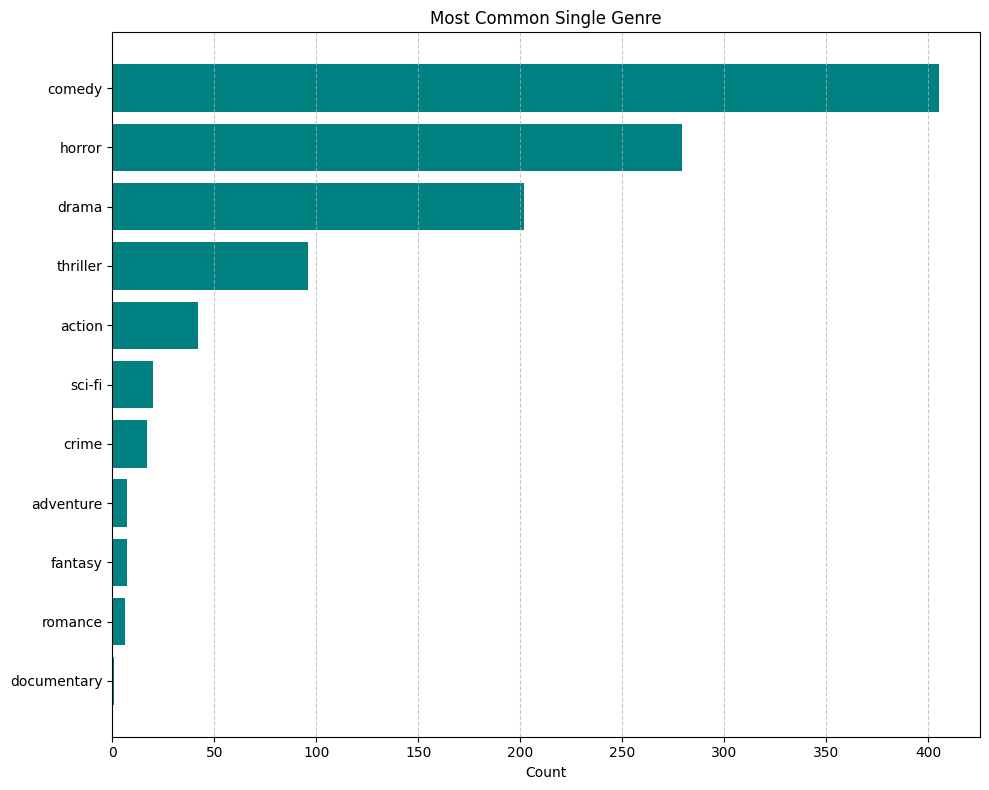

In [42]:
labels = [' | '.join(sorted(g)) for g in top_multi_genres.index]
plt.figure(figsize=(10, 8))
plt.barh(labels, top_multi_genres.values, color='teal')
plt.xlabel('Count')
plt.title('Most Common Single Genre')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()